# SECTION 1: DECLARE THE MODULES

In [4]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [5]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=998a78394f8619892d5eae982c6e91eaede42c251871c544043910160cfaa2dc
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [6]:
DataSet

'training_attack_types.txt'

In [7]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [8]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [9]:
attack_mapping

{'apache2': 'dos',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'httptunnel': 'u2r',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'mailbomb': 'dos',
 'mscan': 'probe',
 'multihop': 'r2l',
 'named': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'normal': 'benign',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'processtable': 'dos',
 'ps': 'u2r',
 'rootkit': 'u2r',
 'saint': 'probe',
 'satan': 'probe',
 'sendmail': 'r2l',
 'smurf': 'dos',
 'snmpgetattack': 'dos',
 'snmpguess': 'r2l',
 'spy': 'r2l',
 'sqlattack': 'u2r',
 'teardrop': 'dos',
 'udpstorm': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'worm': 'probe',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'xterm': 'u2r'}

In [10]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [11]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

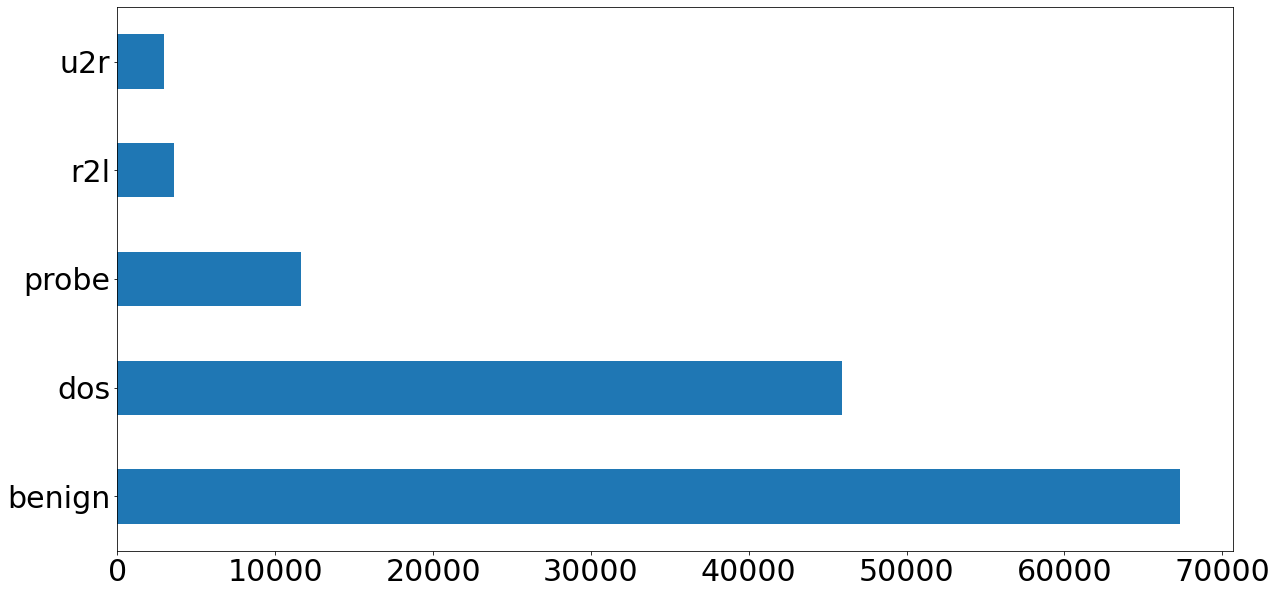

In [12]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [13]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


Multi-Layer Perceptron Classifier

Train Time(s):  45.30148123399999
[[9026   57  590   38    0]
 [1804 5661  170    1    0]
 [ 489  166 1768    0    0]
 [1966  255    2  351    0]
 [ 182    8    2    8    0]]
error: 0.2545244854506742
Classification Report:
              precision    recall  f1-score   support

      benign       0.67      0.93      0.78      9711
         dos       0.92      0.74      0.82      7636
       probe       0.70      0.73      0.71      2423
         r2l       0.88      0.14      0.24      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.75     22544
   macro avg       0.63      0.51      0.51     22544
weighted avg       0.78      0.75      0.72     22544

Test Time(s):  0.6406531529999029
************************************
The accuracy for each attack type is [0.92946144 0.74135673 0.72967396 0.13636364 0.        ]
************************************
the Fpr rate is: [0.34606094 0.03259995 0.03797028 0.00235353 0.        ]



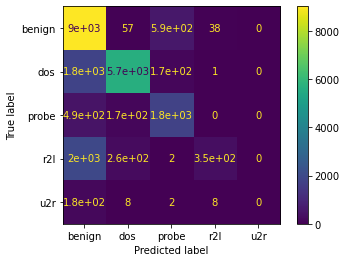

In [14]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import timeit

start1 = timeit.default_timer()
classifier_1 = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)

classifier_1.fit(train_x, train_Y)
stop1 = timeit.default_timer()
train_time1= stop1 - start1
#Train time
print('Train Time(s): ',train_time1)
start2 = timeit.default_timer()
prediction_y_1 = classifier_1.predict(test_x)

P = confusion_matrix(test_Y,prediction_y_1)
error = zero_one_loss(test_Y,prediction_y_1)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(test_Y,prediction_y_1))
stop2 = timeit.default_timer()
test_time1= stop2 - start2 
#Test time
print('Test Time(s): ',test_time1)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive1 = P.sum(axis=0) - P.diagonal()
FalseNegative1 = P.sum(axis=1) - P.diagonal()
TruePositive1 = P.diagonal()
TrueNegative1 = P.sum() - (FalsePositive1 + FalseNegative1 + TruePositive1)
print('************************************')
print('the Fpr rate is:', FalsePositive1/(FalsePositive1 + TrueNegative1))
print()
plot_confusion_matrix(classifier_1, test_x, test_Y)
plt.show()



Logistic Regression

Train Time(s):  19.873456025999985
[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]
error: 0.2469393186657204
Classification Report:
              precision    recall  f1-score   support

      benign       0.66      0.93      0.77      9711
         dos       0.97      0.79      0.87      7636
       probe       0.74      0.75      0.75      2423
         r2l       0.91      0.04      0.07      2574
         u2r       0.80      0.04      0.08       200

    accuracy                           0.75     22544
   macro avg       0.81      0.51      0.51     22544
weighted avg       0.80      0.75      0.72     22544

Test Time(s):  0.9125117710000268
************************************
The accuracy for each attack type is [0.92606323 0.79256155 0.75319851 0.03846154 0.04      ]
************************************
the Fpr rate is: [3.67100444e-01 1.30131473e-02 3.23045574e-02 5.00751127e-04
 8.950

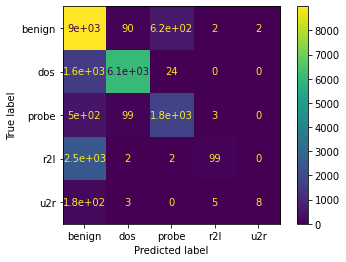

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import timeit

start3 = timeit.default_timer()
classifier_2 = LogisticRegression(random_state=0)
classifier_2.fit(train_x, train_Y)
stop3 = timeit.default_timer()
train_time2 = stop3 - start3
#Train time
print('Train Time(s): ',train_time2)
start4 = timeit.default_timer()
prediction_y_2 = classifier_2.predict(test_x)

P = confusion_matrix(test_Y,prediction_y_2)
error = zero_one_loss(test_Y,prediction_y_2)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(test_Y,prediction_y_2))
stop4 = timeit.default_timer()
test_time2 = stop4 - start4
#Test time
print('Test Time(s): ',test_time2)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive2 = P.sum(axis=0) - P.diagonal()
FalseNegative2 = P.sum(axis=1) - P.diagonal()
TruePositive2 = P.diagonal()
TrueNegative2 = P.sum() - (FalsePositive2 + FalseNegative2 + TruePositive2)
print('************************************')
print('the Fpr rate is:', FalsePositive2/(FalsePositive2 + TrueNegative2))
print()
plot_confusion_matrix(classifier_2, test_x, test_Y)
plt.show()

Nearest Centroid

Train Time(s):  0.3140908699999727
[[9402    6  276   26    1]
 [2523 1949 3164    0    0]
 [ 112  225 2086    0    0]
 [1975    3  107  486    3]
 [  53    0  114   10   23]]
error: 0.38138750887154005
Classification Report:
              precision    recall  f1-score   support

      benign       0.67      0.97      0.79      9711
         dos       0.89      0.26      0.40      7636
       probe       0.36      0.86      0.51      2423
         r2l       0.93      0.19      0.31      2574
         u2r       0.85      0.12      0.20       200

    accuracy                           0.62     22544
   macro avg       0.74      0.48      0.44     22544
weighted avg       0.74      0.62      0.57     22544

Test Time(s):  0.9474734820000776
************************************
The accuracy for each attack type is [0.96818041 0.25523834 0.86091622 0.18881119 0.115     ]
************************************
the Fpr rate is: [3.63360087e-01 1.56962705e-02 1.81949207e-01 1.80270406e-03
 1.79

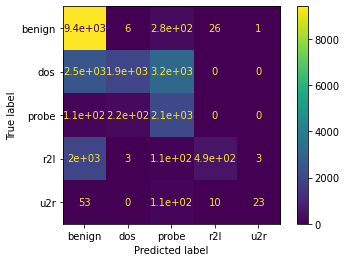

In [16]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import NearestCentroid
import timeit

start5 = timeit.default_timer()

classifier_3 = NearestCentroid()
classifier_3.fit(train_x, train_Y)
stop5 = timeit.default_timer()
train_time3 = stop5 - start5
#Train time
print('Train Time(s): ',train_time3)
start6 = timeit.default_timer()
prediction_y_3 = classifier_3.predict(test_x)

P = confusion_matrix(test_Y, prediction_y_3)
error = zero_one_loss(test_Y, prediction_y_3)

print(P)
print('error:', error)
print('Classification Report:')
print(classification_report(test_Y, prediction_y_3))
stop6 = timeit.default_timer()
test_time3 = stop6 - start6 
#Test time
print('Test Time(s): ',test_time3)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive3 = P.sum(axis=0) - P.diagonal()
FalseNegative3 = P.sum(axis=1) - P.diagonal()
TruePositive3 = P.diagonal()
TrueNegative3 = P.sum() - (FalsePositive3 + FalseNegative3 + TruePositive3)
print('************************************')
print('the Fpr rate is:', FalsePositive3/(FalsePositive3 + TrueNegative3))
print()
plot_confusion_matrix(classifier_3, test_x, test_Y)
plt.show()



Random Forest Classifier

Train Time(s):  4.731639030000224
[[9698   13    0    0    0]
 [2770 4866    0    0    0]
 [1243 1180    0    0    0]
 [2574    0    0    0    0]
 [ 184   16    0    0    0]]
error: 0.3539744499645139
Classification Report:
              precision    recall  f1-score   support

      benign       0.59      1.00      0.74      9711
         dos       0.80      0.64      0.71      7636
       probe       0.00      0.00      0.00      2423
         r2l       0.00      0.00      0.00      2574
         u2r       0.00      0.00      0.00       200

    accuracy                           0.65     22544
   macro avg       0.28      0.33      0.29     22544
weighted avg       0.52      0.65      0.56     22544

Test Time(s):  1.0354107289999774
************************************
The accuracy for each attack type is [0.99866131 0.63724463 0.         0.         0.        ]
************************************
the Fpr rate is: [0.52762409 0.0810974  0.         0.         0.        ]



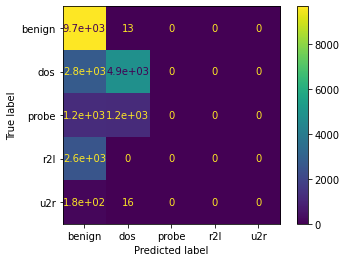

In [17]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import timeit

start7 = timeit.default_timer()
classifier_4 = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier_4.fit(train_x, train_Y)
stop7 = timeit.default_timer()
train_time4 = stop7 - start7
#Train time
print('Train Time(s): ',train_time4)
start8 = timeit.default_timer()
prediction_y_4 = classifier_4.predict(test_x)

P = confusion_matrix(test_Y, prediction_y_4)
error = zero_one_loss(test_Y, prediction_y_4)

print(P)
print('error:',error)
print('Classification Report:')
print(classification_report(test_Y, prediction_y_4))
stop8 = timeit.default_timer()
test_time4 = stop8 - start8
#Test time
print('Test Time(s): ',test_time4)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive4 = P.sum(axis=0) - P.diagonal()
FalseNegative4 = P.sum(axis=1) - P.diagonal()
TruePositive4 = P.diagonal()
TrueNegative4 = P.sum() - (FalsePositive4 + FalseNegative4 + TruePositive4)
print('************************************')
print('the Fpr rate is:', FalsePositive4/(FalsePositive4 + TrueNegative4))
print()
plot_confusion_matrix(classifier_4, test_x, test_Y)
plt.show()

Support Vector Machine

Train Time(s):  175.19495878399994
[[9462   62  187    0    0]
 [1882 5693   61    0    0]
 [ 836  175 1412    0    0]
 [2318    0    4  252    0]
 [ 177    0   15    3    5]]
error: 0.2537260468417317
Classification Report:
              precision    recall  f1-score   support

      benign       0.64      0.97      0.78      9711
         dos       0.96      0.75      0.84      7636
       probe       0.84      0.58      0.69      2423
         r2l       0.99      0.10      0.18      2574
         u2r       1.00      0.03      0.05       200

    accuracy                           0.75     22544
   macro avg       0.89      0.49      0.51     22544
weighted avg       0.82      0.75      0.71     22544

Test Time(s):  20.33766886400008
************************************
The accuracy for each attack type is [0.97435897 0.74554741 0.58274866 0.0979021  0.025     ]
************************************
the Fpr rate is: [4.06218343e-01 1.58975047e-02 1.32697182e-02 1.50225338e-04
 0.0000

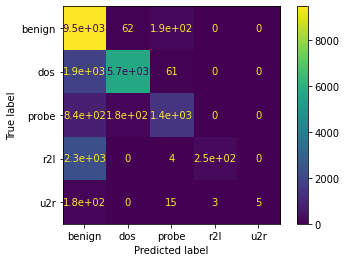

In [18]:
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
import timeit

start9 = timeit.default_timer()
classifier_5 = svm.SVC()
classifier_5.fit(train_x, train_Y)
stop9 = timeit.default_timer()
train_time5 = stop9 - start9
#Train time
print('Train Time(s): ',train_time5)
start10 = timeit.default_timer()
prediction_y_5 = classifier_5.predict(test_x)

P = confusion_matrix(test_Y, prediction_y_5)
error = zero_one_loss(test_Y, prediction_y_5)

print(P)
print('error:', error)
print('Classification Report:')
print(classification_report(test_Y, prediction_y_5))
stop10 = timeit.default_timer()
test_time5 = stop10 - start10 
#Test time
print('Test Time(s): ',test_time5)
print('************************************')
print('The accuracy for each attack type is', P.diagonal()/P.sum(axis=1))
FalsePositive5 = P.sum(axis=0) - P.diagonal()
FalseNegative5 = P.sum(axis=1) - P.diagonal()
TruePositive5 = P.diagonal()
TrueNegative5 = P.sum() - (FalsePositive5 + FalseNegative5 + TruePositive5)
print('************************************')
print('the Fpr rate is:', FalsePositive5/(FalsePositive5 + TrueNegative5))
print()
plot_confusion_matrix(classifier_5, test_x, test_Y)
plt.show()

Confusion Matrix for all algorithms

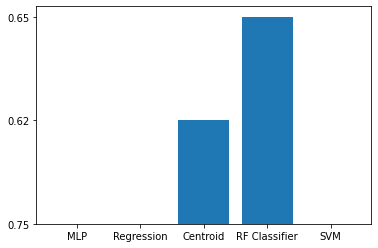

In [23]:
from sklearn.metrics import plot_confusion_matrix
B_R=['MLP',  'Regression','Centroid', 'RF Classifier','SVM']
B_Y=['0.75','0.75','0.62','0.65','0.75']
plt.bar(B_R,B_Y)
plt.show()